In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('C:\\Users\\Hp\\Desktop\\creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
fraud_count = df['Class'].value_counts()[1]
nonfraud_count = df['Class'].value_counts()[0]

print(f"Number of Fraud Records: {fraud_count}")
print(f"Number of Non-Fraud Records: {nonfraud_count}")

Number of Fraud Records: 492
Number of Non-Fraud Records: 284315


In [5]:
fraud_data = df[df['Class'] == 1]
not_fraud_data = df[df['Class'] == 0]

fraud_size = 469

# Randomly sample a subset of fraud data
fraud_data_sampled = fraud_data.sample(n=fraud_size, random_state=42)

nonfraud_size = 10000
# Randomly sample a subset of not fraud data
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, random_state=42)

# Concatenate fraud and sampled not fraud data to create a partially balanced dataset
random_sample_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])

# Shuffle the dataset
random_sample_df = random_sample_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(random_sample_df)

           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10464   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10465  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10466   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10467   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10468   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V21 

In [6]:
total_null_values = random_sample_df.isna().sum()
print("Total Null Values:", total_null_values)

Total Null Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
total_duplicates = random_sample_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 19


In [8]:
random_sample_df.drop_duplicates(inplace=True)
print(random_sample_df)

           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10464   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10465  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10466   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10467   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10468   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V21 

In [9]:
description=random_sample_df.describe()
print(description)

                Time            V1            V2            V3            V4  \
count   10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean    94631.658182     -0.191122      0.147069     -0.300308      0.185718   
std     47515.057419      2.489001      1.918253      2.429558      1.752485   
min         0.000000    -30.552380    -32.494845    -31.103685     -4.790224   
25%     54186.000000     -0.995440     -0.576400     -1.062824     -0.810192   
50%     85014.000000     -0.045415      0.103920      0.096928      0.044789   
75%    139134.250000      1.289356      0.886562      0.978076      0.884404   
max    172768.000000      2.398119     22.057729      3.770236     11.927512   

                 V5            V6            V7            V8            V9  \
count  10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean      -0.100491     -0.063392     -0.216265      0.048161     -0.094229   
std        1.802765      1.386576      2.0

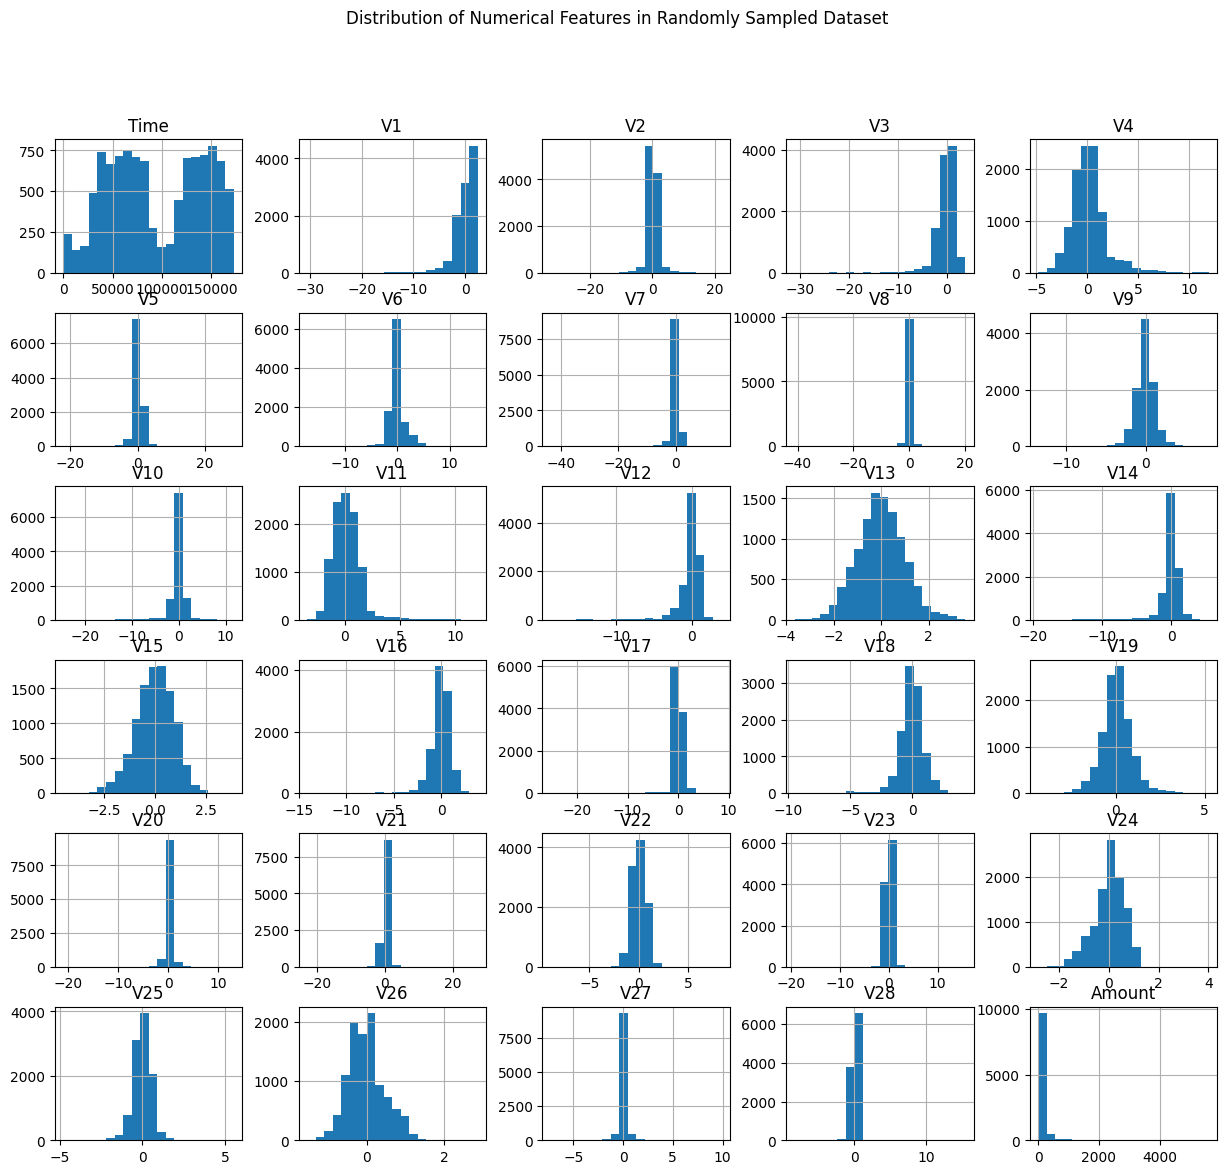

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

random_sample_df.drop('Class', axis=1).hist(figsize=(15, 13), bins=20)
plt.suptitle('Distribution of Numerical Features in Randomly Sampled Dataset')
plt.show()

In [11]:
class_counts = random_sample_df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Class
0    9999
1     451
Name: count, dtype: int64


In [12]:
X = random_sample_df.drop(["Class"], axis=1)
Y = random_sample_df["Class"]

In [13]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis

# Resetting index for X and Y
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Calculate Mahalanobis distance
covariance = np.cov(X.T)
mean = np.mean(X, axis=0)
distances = [mahalanobis(x, mean, np.linalg.inv(covariance)) for x in X.values]

# Define the threshold for outliers
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify and handle outliers
outlier_mask = np.array(distances) > threshold
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Identify and handle outliers by removing them
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Display the modified feature set and labels without outliers
print(X_no_outliers)
print(Y_no_outliers)

           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10100   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10101  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10102   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10103   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10104   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V20 

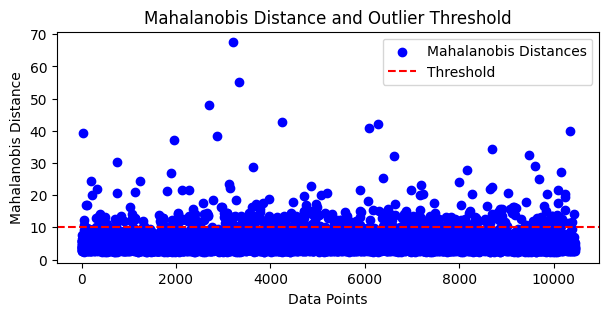

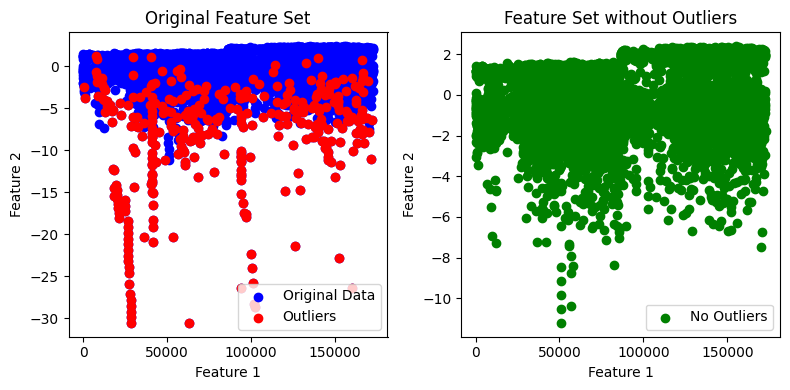

In [14]:
import matplotlib.pyplot as plt

# mhalanobis distances
plt.figure(figsize=(7, 3))
plt.scatter(range(len(distances)), distances, c='blue', label='Mahalanobis Distances')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Data Points')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance and Outlier Threshold')
plt.legend()
plt.show()

# before and after outliers removal
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Original Data')
plt.scatter(X[outlier_mask].iloc[:, 0], X[outlier_mask].iloc[:, 1], c='red', label='Outliers')
plt.title('Original Feature Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_no_outliers.iloc[:, 0], X_no_outliers.iloc[:, 1], c='green', label='No Outliers')
plt.title('Feature Set without Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X_no_outliers, Y_no_outliers, test_size=0.3, random_state=42)

In [16]:
# Train the decision tree model
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=4, criterion="entropy")
model.fit(X_train, Y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the indices
indices = np.argsort(feature_importances)[::-1]

# Select the top N features (e.g., top 10)
top_n = 10
top_n_features = X_train.columns[indices[:top_n]]

# Subset the training and test sets with the top N features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

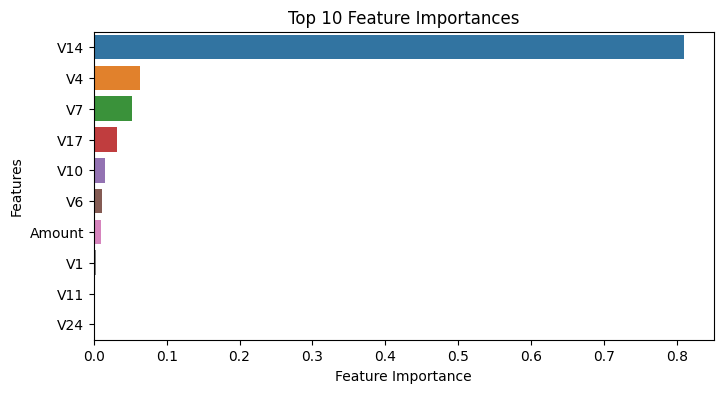

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances[indices[:top_n]], y=top_n_features)
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [19]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42,min_samples_leaf=10, max_depth=4,criterion="entropy")

# Train the model on the training data
dt_model.fit(X_train_selected, Y_train)

# Make predictions on the test set
Y_pred = dt_model.predict(X_test_selected)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

# Assuming you have Y_test and Y_pred defined
# ...

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report_result = classification_report(Y_test, Y_pred)
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, Y_pred, average='weighted')

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2935
           1       0.97      0.80      0.88        97

    accuracy                           0.99      3032
   macro avg       0.98      0.90      0.94      3032
weighted avg       0.99      0.99      0.99      3032


Confusion Matrix:
[[2933    2]
 [  19   78]]

Accuracy: 0.9930738786279684
Precision: 0.9929697946385796
Recall: 0.9930738786279684
F1 Score: 0.992751268624704


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

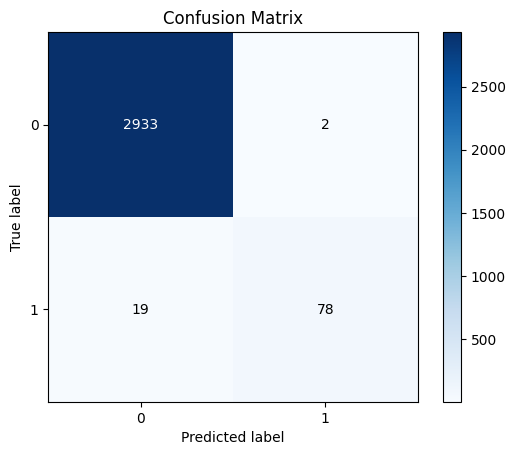

In [25]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)

In [26]:
print('Training set score: {:.4f}'.format(dt_model.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(dt_model.score(X_test_selected, Y_test)))

Training set score: 0.9934
Test set score: 0.9931


In [27]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(max_iter=500)

logistic_regressor.fit(X_train_selected, Y_train)
L_pred = logistic_regressor.predict(X_test_selected)

In [28]:
# Evaluate the model
accuracy = accuracy_score(Y_test, L_pred)
classification_report_result = classification_report(Y_test, L_pred)
confusion_matrix_result = confusion_matrix(Y_test, L_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, L_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2935
           1       0.99      0.82      0.90        97

    accuracy                           0.99      3032
   macro avg       0.99      0.91      0.95      3032
weighted avg       0.99      0.99      0.99      3032


Confusion Matrix:
[[2934    1]
 [  17   80]]

Accuracy: 0.9940633245382586
Precision: 0.9940285756203291
Recall: 0.9940633245382586
F1 Score: 0.9938045765394985


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

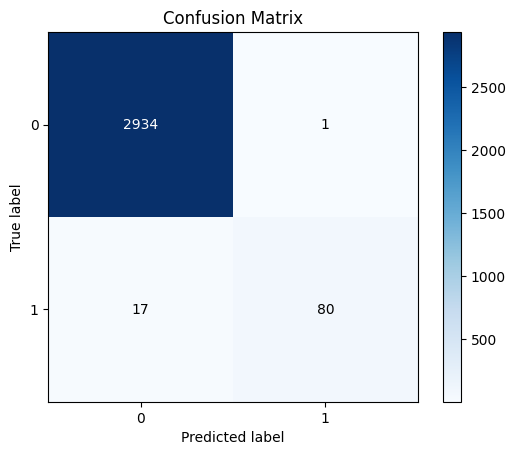

In [30]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, L_pred)

In [31]:
print('Training set score: {:.4f}'.format(logistic_regressor.score(X_train_selected, Y_train)))

print('Test set score: {:.4f}'.format(logistic_regressor.score(X_test_selected, Y_test)))

Training set score: 0.9925
Test set score: 0.9941
